# Importing necessary libs

In [1]:
# import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
def determine_raw_test(index: int):
    tests = [
        'Node',
        'Node fibo',
        'Node addUser',
        'bun',
        'bun fibo',
        'bun addUser',
        'deno',
        'deno fibo',
        'deno addUser',
    ]

    limit_left = 0
    limit_right = 3

    for test in tests:
        if limit_left <= index <= limit_right:
            return test
        
        limit_left += 4
        limit_right += 4

    return 'Unknown'

def determine_env(raw_test: str):
    envs = [
        'Node',
        'bun',
        'deno',
    ]

    for env in envs:
        if env in raw_test:
            return env

    return 'Unknown'

def determine_test(raw_test: str):
    tests = [
        'fibo',
        'addUser',
    ]

    for test in tests:
        if test in raw_test:
            return test

    return 'static'

df = "./data/latency_requests_troughput_TEN.csv"

names = ['metric', 'p2_5',	'p50', 'p97_5', 'p99', 'average', 'stddev', 'max', 'min']
df = pd.read_csv(df, header=None, names=names)

# Creating a column identifying each test applied
df['raw_test'] = df.index.to_series().apply(determine_raw_test)
df['env'] = df['raw_test'].apply(determine_env)
df['test'] = df['raw_test'].apply(determine_test)

# Removing every 4th row starting from index 0 to leave only data.
rows_to_remove = df.index[0::4]
df = df.drop(rows_to_remove)

float_columns = ['p2_5', 'p50', 'p97_5', 'p99', 'average', 'stddev', 'max', 'min']
df[float_columns] = df[float_columns].astype(float)

df.head(15)

,metric,p2_5,p50,p97_5,p99,average,stddev,max,min,raw_test,env,test
1,Latency,2.0,2.0,5.0,6.0,2.36,1.35,39.0,1.0,Node,Node,static
2,Requests,3095.0,3333.0,3557.0,3599.0,3334.62,139.10,3613.0,2566.0,Node,Node,static
3,Throughput,1519615.0,1636351.0,1746943.0,1767423.0,1637017.60,68300.33,1773983.0,1259906.0,Node,Node,static
5,Latency,2.0,2.0,5.0,6.0,2.48,1.27,39.0,1.0,Node fibo,Node,fibo
6,Requests,3007.0,3213.0,3453.0,3487.0,3220.39,117.63,3493.0,2612.0,Node fibo,Node,fibo
7,Throughput,4452351.0,4755455.0,5111807.0,5160959.0,4765431.47,174145.67,5169640.0,3865760.0,Node fibo,Node,fibo
9,Latency,2.0,3.0,6.0,9.0,3.31,1.47,36.0,1.0,Node addUser,Node,addUser
10,Requests,2461.0,2657.0,2783.0,2823.0,2650.32,84.84,2834.0,2271.0,Node addUser,Node,addUser
11,Throughput,669183.0,722943.0,757247.0,767999.0,720746.67,23085.46,770848.0,617712.0,Node addUser,Node,addUser
13,Latency,0.0,0.0,1.0,1.0,0.07,0.28,23.0,1.0,bun,bun,static


In [34]:
def plot(df: pd.DataFrame, x: str, y: str, hue: str, x_label: str, y_label: str):
    plt.figure(figsize = (14, 7))
    fig = sns.barplot(df, x=x, y=y, hue=hue)
    for i in fig.containers:
        fig.bar_label(i,)
    fig.set(xlabel=x_label, ylabel=y_label)

In [ ]:
latency_df = df[df['metric'] == 'Latency']

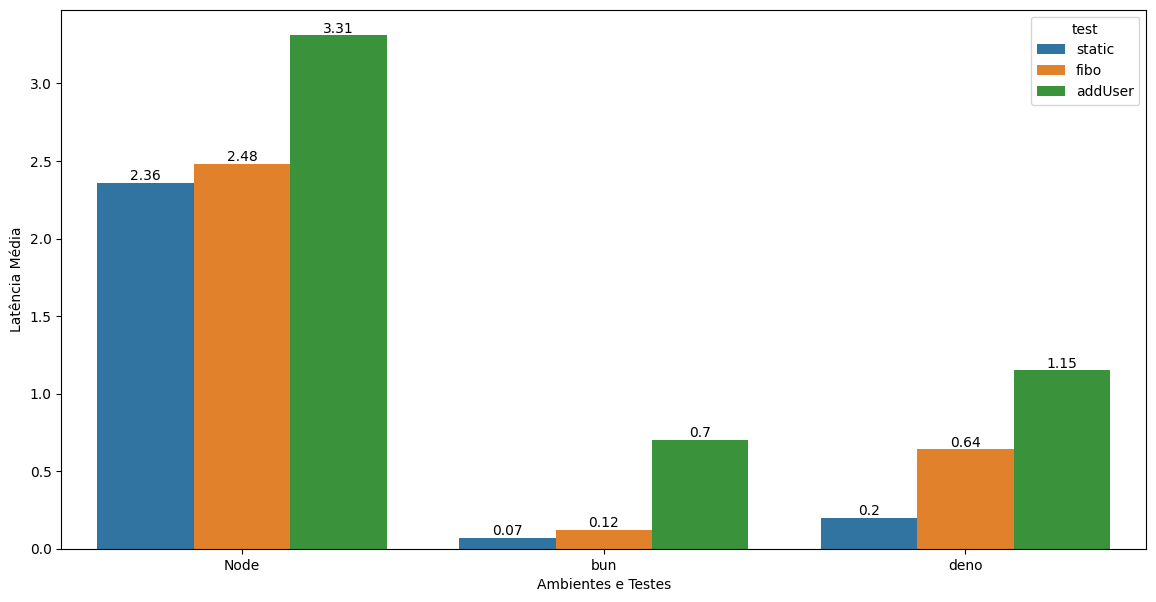

In [35]:
plot(latency_df, 'env', 'average', 'test', 'Ambientes e Testes', 'Latência Média')

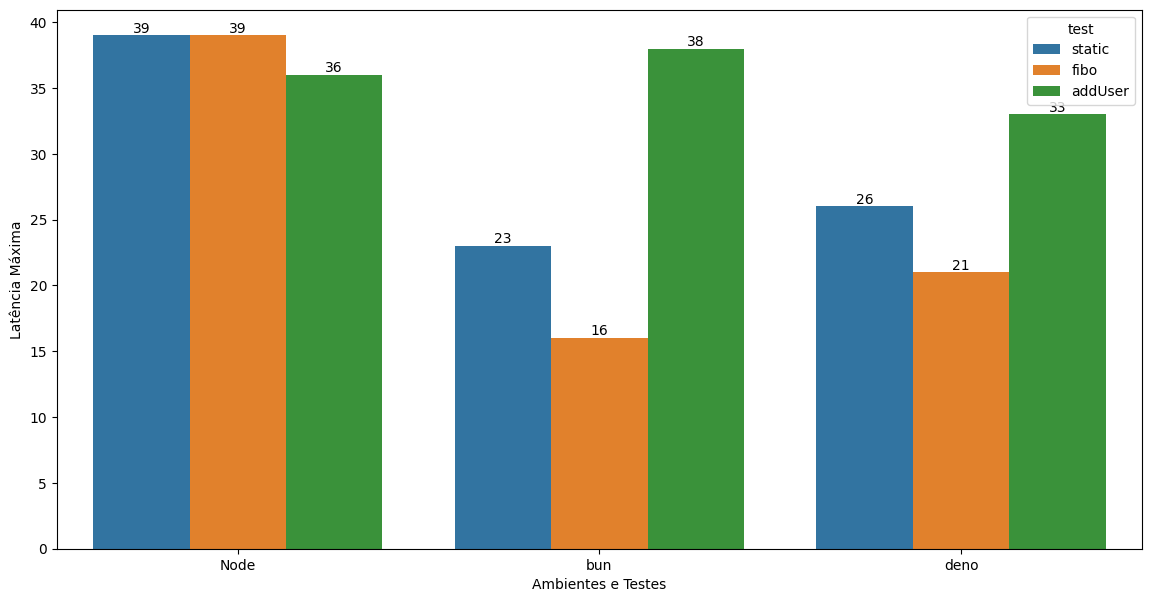

In [37]:
plot(latency_df, 'env', 'max', 'test', 'Ambientes e Testes', 'Latência Máxima')

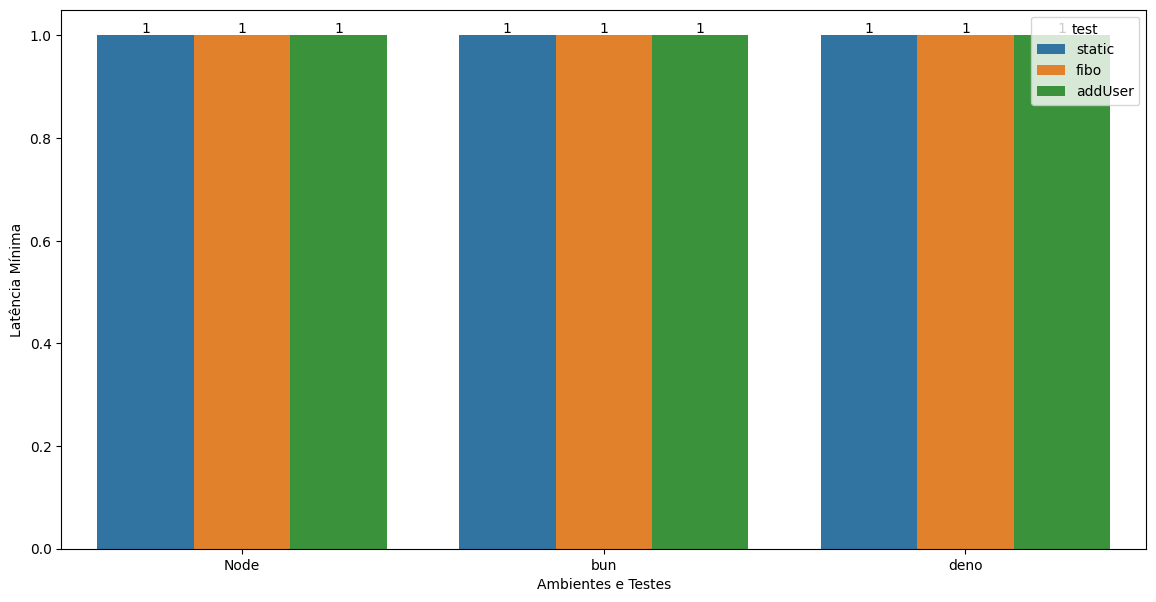

In [38]:
plot(latency_df, 'env', 'min', 'test', 'Ambientes e Testes', 'Latência Mínima')
